In [2]:
from facenet_pytorch import MTCNN, InceptionResnetV1
import torch
import numpy as np
import mmcv, cv2
from PIL import Image, ImageDraw, ImageFont
from IPython import display

In [3]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
print('Running on device: {}'.format(device))

Running on device: cpu


In [4]:
mtcnn = MTCNN(keep_all=True, device=device)
resnet = InceptionResnetV1(pretrained='vggface2').eval()

In [21]:
video = mmcv.VideoReader('newdata.mp4')
frames = [Image.fromarray(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)) for frame in video]

display.Video('newdata.mp4', width=640)

In [29]:
frames_tracked = []
all_embeddings = []
embedding_to_face = {}
frame_to_embedding = {}
stored_faces = []
counter = 0
for i, frame in enumerate(frames):
    print('\rTracking frame: {} '.format(i + 1), end='')
    print("FACE NUMBER IS ", counter)
    # Detect faces
    boxes, _ = mtcnn.detect(frame)
    frame_cropped = mtcnn(frame)
    #print(frame_cropped.size())
    if boxes is not None:
        img_embedding = resnet(torch.tensor(frame_cropped))[0, :]
        img_embedding.unsqueeze(0)
        print(img_embedding.size())
        face = seen(img_embedding)
        if len(all_embeddings) == 0 or face is None:
            print("NEW FACE")
            stored_faces.append(img_embedding)
            embedding_to_face[img_embedding] = counter
            counter += 1
        else:
            print("ALREADY SEEN")
            embedding_to_face[img_embedding] = embedding_to_face[face]
        all_embeddings.append(img_embedding)
        #frame_to_embedding[i] = img_embedding
    frame_draw = frame.copy()
    draw = ImageDraw.Draw(frame_draw)
    if boxes is not None:
        for box in boxes:
            b = box.tolist() #[x0, y0, x1, y1]
            draw.rectangle(box.tolist(), outline=(255, 0, 0), width=6)
            font = ImageFont.truetype("Gidole-Regular.ttf", size=52)
            draw.text((b[2], b[3]-15), "Person #" + str(counter), fill = "red", font=font)
    # Add to frame list
    frames_tracked.append(frame_draw.resize((640, 360), Image.BILINEAR))
print('\nDone')

Tracking frame: 1 FACE NUMBER IS  0


/var/folders/c8/sb_pbvld6p3dlwfkw274vqtw0000gn/T/ipykernel_74565/1705234913.py:15: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  img_embedding = resnet(torch.tensor(frame_cropped))[0, :]


torch.Size([512])
DIST IS 1000
NEW FACE
Tracking frame: 2 FACE NUMBER IS  1
torch.Size([512])
DIST IS 0.21445100009441376
ALREADY SEEN
Tracking frame: 3 FACE NUMBER IS  1
torch.Size([512])
DIST IS 0.22787873446941376
ALREADY SEEN
Tracking frame: 4 FACE NUMBER IS  1
torch.Size([512])
DIST IS 0.2502392828464508
ALREADY SEEN
Tracking frame: 5 FACE NUMBER IS  1
torch.Size([512])
DIST IS 0.27365726232528687
ALREADY SEEN
Tracking frame: 6 FACE NUMBER IS  1
torch.Size([512])
DIST IS 0.33428308367729187
ALREADY SEEN
Tracking frame: 7 FACE NUMBER IS  1
torch.Size([512])
DIST IS 0.3138629198074341
ALREADY SEEN
Tracking frame: 8 FACE NUMBER IS  1
torch.Size([512])
DIST IS 0.2906351089477539
ALREADY SEEN
Tracking frame: 9 FACE NUMBER IS  1
torch.Size([512])
DIST IS 1.1954290866851807
NEW FACE
Tracking frame: 10 FACE NUMBER IS  2
torch.Size([512])
DIST IS 0.2821460962295532
ALREADY SEEN
Tracking frame: 11 FACE NUMBER IS  2
torch.Size([512])
DIST IS 0.31755727529525757
ALREADY SEEN
Tracking frame: 1

torch.Size([512])
DIST IS 0.42764365673065186
ALREADY SEEN
Tracking frame: 90 FACE NUMBER IS  2
torch.Size([512])
DIST IS 0.38578957319259644
ALREADY SEEN
Tracking frame: 91 FACE NUMBER IS  2
torch.Size([512])
DIST IS 0.4318797290325165
ALREADY SEEN
Tracking frame: 92 FACE NUMBER IS  2
torch.Size([512])
DIST IS 0.4023618698120117
ALREADY SEEN
Tracking frame: 93 FACE NUMBER IS  2
torch.Size([512])
DIST IS 0.48154380917549133
ALREADY SEEN
Tracking frame: 94 FACE NUMBER IS  2
torch.Size([512])
DIST IS 0.6651875972747803
ALREADY SEEN
Tracking frame: 95 FACE NUMBER IS  2
torch.Size([512])
DIST IS 1.0083653926849365
ALREADY SEEN
Tracking frame: 96 FACE NUMBER IS  2
Tracking frame: 97 FACE NUMBER IS  2
Tracking frame: 98 FACE NUMBER IS  2
Tracking frame: 99 FACE NUMBER IS  2
Tracking frame: 100 FACE NUMBER IS  2
Tracking frame: 101 FACE NUMBER IS  2
Tracking frame: 102 FACE NUMBER IS  2
Tracking frame: 103 FACE NUMBER IS  2
Tracking frame: 104 FACE NUMBER IS  2
Tracking frame: 105 FACE NUMBER

torch.Size([512])
DIST IS 0.9330913424491882
ALREADY SEEN
Tracking frame: 192 FACE NUMBER IS  3
torch.Size([512])
DIST IS 0.9306831359863281
ALREADY SEEN
Tracking frame: 193 FACE NUMBER IS  3
torch.Size([512])
DIST IS 0.9623370170593262
ALREADY SEEN
Tracking frame: 194 FACE NUMBER IS  3
torch.Size([512])
DIST IS 0.9723395705223083
ALREADY SEEN
Tracking frame: 195 FACE NUMBER IS  3
torch.Size([512])
DIST IS 0.9635061621665955
ALREADY SEEN
Tracking frame: 196 FACE NUMBER IS  3
torch.Size([512])
DIST IS 0.959213137626648
ALREADY SEEN
Tracking frame: 197 FACE NUMBER IS  3
torch.Size([512])
DIST IS 0.9642447829246521
ALREADY SEEN
Tracking frame: 198 FACE NUMBER IS  3
torch.Size([512])
DIST IS 0.9743444919586182
ALREADY SEEN
Tracking frame: 199 FACE NUMBER IS  3
torch.Size([512])
DIST IS 0.9700549840927124
ALREADY SEEN
Tracking frame: 200 FACE NUMBER IS  3
torch.Size([512])
DIST IS 0.9743911027908325
ALREADY SEEN
Tracking frame: 201 FACE NUMBER IS  3
torch.Size([512])
DIST IS 0.9399389028549

In [28]:
def seen(new_embedding):
    min_dist = 1000
    if stored_faces:
        min_face = stored_faces[0]
    for i in range(len(stored_faces)):
        face = stored_faces[i]
        p2 = torch.nn.PairwiseDistance(p=2)
        d = p2(face, new_embedding)
        dist = d.item()
        if dist < min_dist:
            min_dist = dist
            min_face = face
        min_dist = min(dist, min_dist)
    print("DIST IS", min_dist)
    if min_dist < 1.14:
        return min_face
    return None

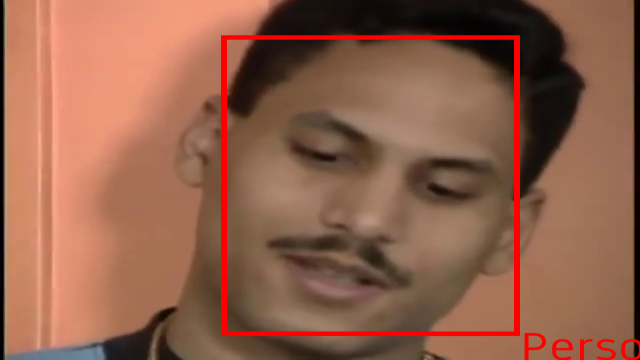

In [30]:
d = display.display(frames_tracked[0], display_id=True)
i = 1
try:
    while True:
        d.update(frames_tracked[i % len(frames_tracked)])
        i += 1
except KeyboardInterrupt:
    pass

In [35]:
dim = frames_tracked[0].size
fourcc = cv2.VideoWriter_fourcc(*'FMP4')    
video_tracked = cv2.VideoWriter('video_tracked.mp4', fourcc, 25.0, dim)
for frame in frames_tracked:
    video_tracked.write(cv2.cvtColor(np.array(frame), cv2.COLOR_RGB2BGR))
video_tracked.release()

OpenCV: FFMPEG: tag 0x34504d46/'FMP4' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'
